
# ***Exploration and Cleaning of the Transactions Table***






In [1]:
import pandas as pd
# Display all columns
pd.set_option('display.max_columns', None)

# Display all rows
pd.set_option('display.max_rows', None)

In [2]:
import urllib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import PIL
import os
from pathlib import Path




In [3]:
#from google.colab import auth
#auth.authenticate_user()
#from google.cloud import bigquery
#from pandas_gbq import read_gbq


#project_id = "data-analytics-bootcamp-363212"

#query = '''
#SELECT *
#FROM `data-analytics-bootcamp-363212.neo_bank.transactions`
#'''

#df_transactions = read_gbq(query, project_id=project_id)

In [4]:
#os.makedirs("/content/drive/MyDrive/Documents", exist_ok=True)

#df_transactions.to_csv(
 #   "/content/drive/MyDrive/Documents/eval_transactions.csv",
  #  index=False)

#print("Saved to Google Drive Documents folder")

In [5]:
#df_transactions.to_csv("eval_transactions.csv", index=False)

#from google.colab import files
#files.download("eval_transactions.csv")

In [6]:
#from google.colab import drive
#drive.mount('/content/drive')

In [7]:
df_transactions = pd.read_csv(
    "eval_transactions.csv"
)

df_transactions.head()

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date
0,transaction_505,TOPUP,AED,298.62,COMPLETED,NaN,NaN,NaN,NaN,INBOUND,user_4773,2018-08-02 09:41:07.426363+00:00
1,transaction_1755379,EXCHANGE,AED,3.51,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_10435,2018-09-06 10:23:15.807148+00:00
2,transaction_1667,EXCHANGE,AED,0.05,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_397,2018-05-16 06:09:28.063037+00:00
3,transaction_1429,EXCHANGE,AED,24.14,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_4399,2018-12-19 20:22:03.550130+00:00
4,transaction_345,EXCHANGE,AED,0.21,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_1731,2018-10-27 13:29:56.524826+00:00


In [8]:
df_transactions["ea_merchant_city"] = df_transactions["ea_merchant_city"].fillna("Not Applicable")
df_transactions["ea_merchant_country"] = df_transactions["ea_merchant_country"].fillna("Not Applicable")
df_transactions["ea_cardholderpresence"] = df_transactions["ea_cardholderpresence"].fillna("Not Applicable")

In [9]:
df_transactions["ea_merchant_mcc"] = df_transactions["ea_merchant_mcc"].fillna(-1)

In [10]:
df_transactions.head()

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date
0,transaction_505,TOPUP,AED,298.62,COMPLETED,Not Applicable,-1.0,Not Applicable,Not Applicable,INBOUND,user_4773,2018-08-02 09:41:07.426363+00:00
1,transaction_1755379,EXCHANGE,AED,3.51,COMPLETED,Not Applicable,-1.0,Not Applicable,Not Applicable,OUTBOUND,user_10435,2018-09-06 10:23:15.807148+00:00
2,transaction_1667,EXCHANGE,AED,0.05,COMPLETED,Not Applicable,-1.0,Not Applicable,Not Applicable,OUTBOUND,user_397,2018-05-16 06:09:28.063037+00:00
3,transaction_1429,EXCHANGE,AED,24.14,COMPLETED,Not Applicable,-1.0,Not Applicable,Not Applicable,OUTBOUND,user_4399,2018-12-19 20:22:03.550130+00:00
4,transaction_345,EXCHANGE,AED,0.21,COMPLETED,Not Applicable,-1.0,Not Applicable,Not Applicable,OUTBOUND,user_1731,2018-10-27 13:29:56.524826+00:00


In [11]:
df_transactions["transactions_type"].value_counts()

,count
transactions_type,
CARD_PAYMENT,1475780
TRANSFER,500409
TOPUP,388331
EXCHANGE,159148
ATM,93675
CASHBACK,82789
FEE,23659
CARD_REFUND,11962
TAX,2829


In [12]:
df_transactions.info(show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2740075 entries, 0 to 2740074
Data columns (total 12 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   transaction_id         2740075 non-null  object 
 1   transactions_type      2740075 non-null  object 
 2   transactions_currency  2740075 non-null  object 
 3   amount_usd             2740075 non-null  float64
 4   transactions_state     2740075 non-null  object 
 5   ea_cardholderpresence  2740075 non-null  object 
 6   ea_merchant_mcc        2740075 non-null  float64
 7   ea_merchant_city       2740075 non-null  object 
 8   ea_merchant_country    2740075 non-null  object 
 9   direction              2740075 non-null  object 
 10  user_id                2740075 non-null  object 
 11  created_date           2740075 non-null  object 
dtypes: float64(2), object(10)
memory usage: 250.9+ MB


In [13]:
df_transactions.nunique()

,0
transaction_id,2740075
transactions_type,10
transactions_currency,35
amount_usd,48548
transactions_state,6
ea_cardholderpresence,4
ea_merchant_mcc,665
ea_merchant_city,63254
ea_merchant_country,199
direction,2


In [14]:
df_transactions.columns = df_transactions.columns.str.lower().str.replace(" ", "_")
text_cols = df_transactions.select_dtypes(include='object').columns

for col in text_cols:
    df_transactions[col] = (df_transactions[col].str.lower() .str.strip().str.replace(r'\s+', '_', regex=True) .str.replace(r'[^\w]', '', regex=True))

In [15]:
df_transactions[df_transactions.duplicated(keep=False)]

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date


In [16]:
df_transactions.tail(20)

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date
2740055,transaction_89344,card_payment,zar,29.62,completed,false,5812.0,mossel_bay,zaf,outbound,user_1805,20181230_0312483308710000
2740056,transaction_1810046,card_payment,zar,37.02,completed,false,5812.0,green_point,zaf,outbound,user_10145,20181128_0902486541250000
2740057,transaction_88964,card_payment,zar,0.20,completed,false,5812.0,johannesburg,zaf,outbound,user_3017,20190117_1026111717150000
2740058,transaction_1810045,card_payment,zar,4.23,completed,false,5812.0,nelspruit,zaf,outbound,user_15106,20181128_0752298795050000
2740059,transaction_1846231,card_payment,zar,3.54,completed,false,5812.0,durban,zaf,outbound,user_13647,20181219_0212200709970000
2740060,transaction_1809880,card_payment,zar,14.54,completed,false,5812.0,hout_bay,zaf,outbound,user_19085,20190404_1857333777030000
2740061,transaction_1846551,card_payment,zar,2.12,completed,false,5813.0,durban,zaf,outbound,user_13647,20181027_1128217539970000
2740062,transaction_227975,card_payment,zar,15.87,completed,false,5813.0,johannesburg,zaf,outbound,user_2818,20180512_0919525958980000
2740063,transaction_1846398,card_payment,zar,23.80,completed,false,5813.0,cape_town_cbd,zaf,outbound,user_18197,20190317_1355445639880000
2740064,transaction_1846752,card_payment,zar,0.00,reverted,false,7349.0,avalon,aus,outbound,user_12577,20181107_1240240938740000


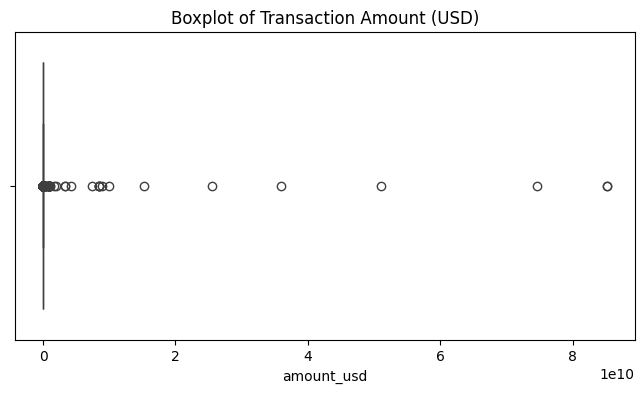

In [17]:
#CHECK FOR OUTLIERS

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.boxplot(x=df_transactions["amount_usd"])
plt.title("Boxplot of Transaction Amount (USD)")
plt.show()

In [18]:
df_transactions["amount_usd"].describe()

,amount_usd
count,2.740075e+06
mean,1.703225e+05
std,9.634014e+07
min,0.000000e+00
25%,2.030000e+00
50%,8.510000e+00
75%,2.822000e+01
max,8.510645e+10


In [19]:
#df_transactions["amount_usd"] = df_transactions["amount_usd"].clip(upper=100)

In [20]:
#df_transactions = df_transactions[df_transactions["amount_usd"] < 70]

In [21]:
#CLEANING THE OUTLIERS

#Q1 = df_transactions["amount_usd"].quantile(0.25)
#Q3 = df_transactions["amount_usd"].quantile(0.75)
#IQR = Q3 - Q1

#lower_bound = Q1 - 1.5 * IQR
#upper_bound = Q3 + 1.5 * IQR

#lower_bound, upper_bound

#df_transactions_clean = df_transactions[
 #   (df_transactions["amount_usd"] >= lower_bound) &
 #   (df_transactions["amount_usd"] <= upper_bound)]

 #sns.boxplot(x=df_transactions_clean["amount_usd"])
#plt.title("Transaction Amount")
#plt.show()




In [22]:

# =========================
# 1. IQR calculation
# =========================
Q1 = df_transactions["amount_usd"].quantile(0.25)
Q3 = df_transactions["amount_usd"].quantile(0.75)
IQR = Q3 - Q1

lower_1 = Q1 - 1.5 * IQR
upper_1 = Q3 + 1.5 * IQR

lower_2 = Q1 - 3 * IQR
upper_2 = Q3 + 3 * IQR

# =========================
# 2. Create NEW dataframe
# =========================
df_iqr = df_transactions.copy()

df_iqr["outlier_level"] = "normal"

df_iqr.loc[
    (df_iqr["amount_usd"] < lower_1) | (df_iqr["amount_usd"] > upper_1),
    "outlier_level"
] = "mild"

df_iqr.loc[
    (df_iqr["amount_usd"] < lower_2) | (df_iqr["amount_usd"] > upper_2),
    "outlier_level"
] = "extreme"


In [23]:
df_iqr.head()

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date,outlier_level
0,transaction_505,topup,aed,298.62,completed,not_applicable,-1.0,not_applicable,not_applicable,inbound,user_4773,20180802_0941074263630000,extreme
1,transaction_1755379,exchange,aed,3.51,completed,not_applicable,-1.0,not_applicable,not_applicable,outbound,user_10435,20180906_1023158071480000,normal
2,transaction_1667,exchange,aed,0.05,completed,not_applicable,-1.0,not_applicable,not_applicable,outbound,user_397,20180516_0609280630370000,normal
3,transaction_1429,exchange,aed,24.14,completed,not_applicable,-1.0,not_applicable,not_applicable,outbound,user_4399,20181219_2022035501300000,normal
4,transaction_345,exchange,aed,0.21,completed,not_applicable,-1.0,not_applicable,not_applicable,outbound,user_1731,20181027_1329565248260000,normal


In [25]:
df_iqr["outlier_level"].value_counts(normalize=True) * 100


,proportion
outlier_level,
normal,86.032901
extreme,8.907128
mild,5.059971
